Certains points abordés ici serviront très peu ou seront abordés pendant l'année. Il s'agit d'approfondissement pour ceux qui ont déjà bien compris les parties précédentes.

In [1]:
"""On importe les bibliothèques scientifiques car elles seront utilisées ensuite"""
import numpy as np
import matplotlib.pyplot as plt


```{tip}
L'ordre des parties va du plus important au moins important.

```

# Fenêtre multi-graphique
Comme expliqué précédemment, on peut créer une fenêtre graphique avec plusieurs tracés (plusieurs axes). Nous vous expliquons comment faire.

## Création de la grille.

```{code-block}
import matplotlib.pyplot as plt
f, ax = plt.subplots(nlignes, ncolonnes)  # nlignes et ncolonnes sont des entiers
```

* `f` toujours la fenêtre graphique
* `ax` est alors un vecteur (si nlignes OU ncolonnes vaut 1) ou un tableau (sinon) qui contient toutes les zones de tracé.

On accède alors à la zone de tracé voulue grâce à 
* `ax[i]` si c'est un vecteur où i est les indices de la ligne ou de la colonne souhaitée.
* `ax[i, j]` si c'est un tableau où i et j sont les indices respectifs de la ligne et de la colonne souhaités.

```{attention}
Comme pour les listes et les vecteurs numpy, __les indices commencent à 0__. Observez l'exemple ci-dessous pour voir les indices des zones de tracés.
```

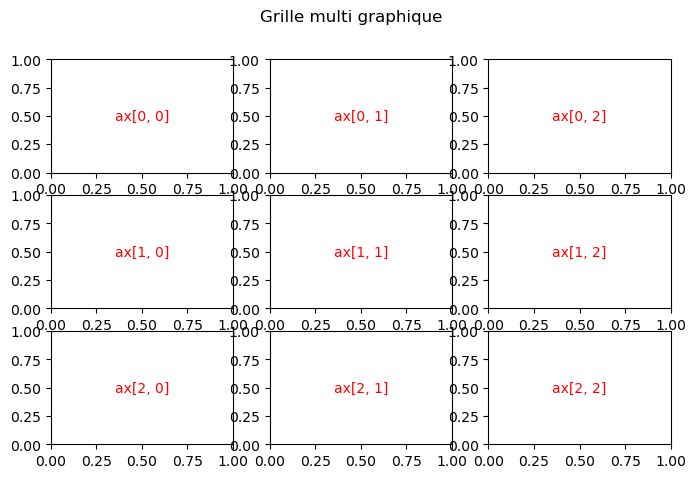

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(3, 3, figsize=(8, 5))

f.suptitle("Grille multi graphique")

for i in range(3):
    for j in range(3):
         ax[i, j].text(0.5, 0.5, 'ax[{}, {}]'.format(i, j), horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes, color='red')
plt.show()

## Création d'un tracé
La création d'un tracé (`hist`, `plot`, `errorbar`) se fait de la même manière que précédemment mais un axe est appelé par la syntaxe `ax[i, j]` ou `ax[i]`. Ci-dessous deux exemples :
* Le premier avec une seule ligne : `ax` est un vecteur, on utilise `ax[i]`
* Le second avec deux lignes et deux colonnes : `ax` est un tableau, on utilise `ax[i, j]`

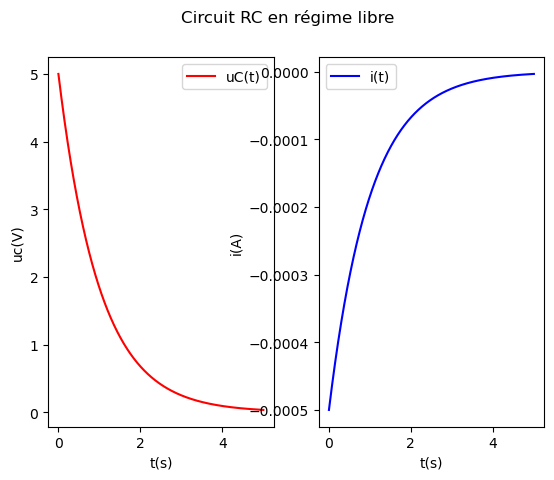

In [3]:
"""Exemple de tracé : sur une seule ligne.
On trace l'évolution temporelle de la tension aux bornes d'un condensateur et de l'intensité qui le traverse dans deux axes différents.
"""

import matplotlib.pyplot as plt
import numpy as np


tau = 1  # Constante de temps
U0 = 5  # Tension initiale
C = 1e-4  # Condensateur

t = np.linspace(0, 5 * tau, 1000)  # On trace 1000 points sur 5 tau.
uc = U0 * np.exp(-t / tau)  # Tension uC
i = - C / tau * U0 * np.exp(-t / tau)  # Intensité

f, ax = plt.subplots(1, 2)  # 1 ligne et 2 colonnes : ax est un vecteur

f.suptitle("Circuit RC en régime libre")
""" Tracé du premier graphique"""
ax[0].set_xlabel("t(s)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit
ax[0].set_ylabel("uc(V)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit

ax[0].plot(t, uc, label='uC(t)', color='red')
ax[0].legend()

""" Tracé du second graphique"""
ax[1].set_xlabel("t(s)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit
ax[1].set_ylabel("i(A)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit

ax[1].plot(t, i, label='i(t)', color='blue')

ax[1].legend()


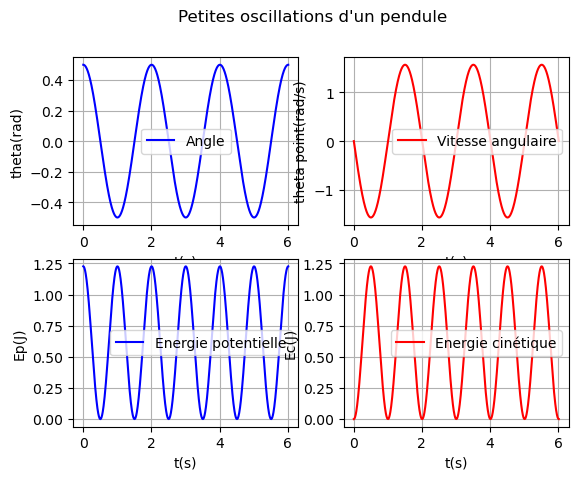

In [4]:
"""Exemple de tracé : un tableau 2*2
On trace l'évolution temporelle de l'angle, de la vitesse angulaire, de l'énergie potentielle et cinétique d'une pendule simple aux petites oscillations
"""
l = 1  # Longueur du pendule (m)
g = 9.81  # Champ de pesanteur (m/s^2)
m = 1  # Masse(kg)
w0 = np.sqrt(g / l)  # Pulsation propre (rad/s)
theta0 = 0.5  # Amplitude des oscillations (rad)

N = 1000
t = np.linspace(0, 3 * 2 * np.pi / w0, N)
theta = theta0 * np.cos(w0 * t)  # Angle
thetapoint = -w0 * theta0 * np.sin(w0 * t)  # Vitesse angulaire
Ep = 1 / 2 * m * g *l * theta ** 2  # Energie potentielle dans l'approximation des petites angles
Ec = 1 / 2 * m * l ** 2 * thetapoint ** 2  # Energie cinétique


"""Création du graphique
"""
f, ax = plt.subplots(2, 2)  # ax est un tableau
f.suptitle("Petites oscillations d'un pendule")

"""Tracé de l'angle : en haut à gauche"""
ax[0, 0].set_xlabel("t(s)")
ax[0, 0].set_ylabel("theta(rad)")
ax[0, 0].plot(t, theta, label="Angle", color="blue")
ax[0, 0].legend()
ax[0, 0].grid()  # On ajoute une grille

"""Tracé de la vitesse angulaire : en haut à droite"""
ax[0, 1].set_xlabel("t(s)")
ax[0, 1].set_ylabel("theta point(rad/s)")
ax[0, 1].plot(t, thetapoint, label="Vitesse angulaire", color="red")
ax[0, 1].legend()
ax[0, 1].grid()  # On ajoute une grille

"""Tracé de l'énergie potentielle : en base à gauche"""
ax[1, 0].set_xlabel("t(s)")
ax[1, 0].set_ylabel("Ep(J)")
ax[1, 0].plot(t, Ep, label="Energie potentielle", color="blue")
ax[1, 0].legend()
ax[1, 0].grid()  # On ajoute une grille

"""Tracé de l'énergie cinétique : en bas à droite"""
ax[1, 1].set_xlabel("t(s)")
ax[1, 1].set_ylabel("Ec(J)")
ax[1, 1].plot(t, Ec, label="Energie cinétique", color="red")
ax[1, 1].legend()
ax[1, 1].grid()  # On ajoute une grille

plt.show()

## Améliorer l'apparence du graphique
On remarque que l'introduction des légendes des axes ou la position de la légende laisse à désirer. Si vous souhaitez obtenir un graphique plus propre voici deux modifications utiles :
* transformer la légende en titre de chaque zone (`ax[i, j].set_title("Titre")`)
* Ajouter __juste avant d'afficher le graphique__ `f.tight_layout()` : matplotlib va alors calculer tout seul les marges à mettre entre les graphiques en tenant compte des légendes et titres (_c'est pourquoi il faut le mettre à la fin puisqu'au début... il n'y a pas de légende !_)

Ci-après le code modifié (voir les lignes MODIF et AJOUT).

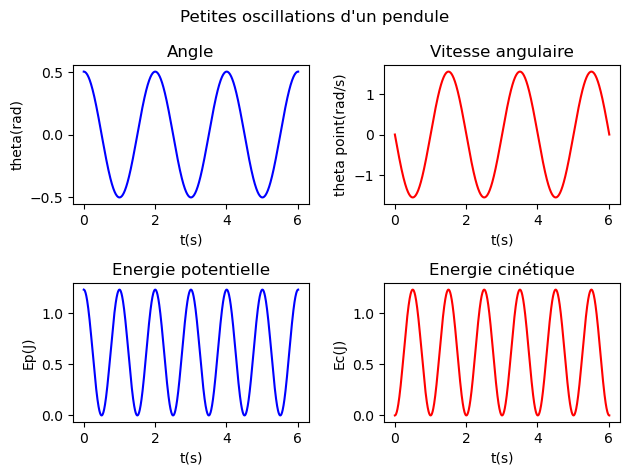

In [5]:
f, ax = plt.subplots(2, 2)  # ax est un tableau
f.suptitle("Petites oscillations d'un pendule")

"""Tracé de l'angle : en haut à gauche"""
ax[0, 0].set_xlabel("t(s)")
ax[0, 0].set_ylabel("theta(rad)")
ax[0, 0].plot(t, theta, label="Angle", color="blue")
ax[0, 0].set_title("Angle")  # MODIF : On met un titre au lieu de la légende (label ne sert d'ailleurs plus à rien)

"""Tracé de la vitesse angulaire : en haut à droite"""
ax[0, 1].set_xlabel("t(s)")
ax[0, 1].set_ylabel("theta point(rad/s)")
ax[0, 1].plot(t, thetapoint, label="Vitesse angulaire", color="red")
ax[0, 1].set_title("Vitesse angulaire")  # MODIF : On met un titre au lieu de la légende (label ne sert d'ailleurs plus à rien)

"""Tracé de l'énergie potentielle : en bas à gauche"""
ax[1, 0].set_xlabel("t(s)")
ax[1, 0].set_ylabel("Ep(J)")
ax[1, 0].plot(t, Ep, label="Energie potentielle", color="blue")
ax[1, 0].set_title("Energie potentielle")  # MODIF : On met un titre au lieu de la légende (label ne sert d'ailleurs plus à rien)

"""Tracé de l'énergie cinétique : en haut à droite"""
ax[1, 1].set_xlabel("t(s)")
ax[1, 1].set_ylabel("Ec(J)")
ax[1, 1].plot(t, Ec, label="Energie cinétique", color="red")
ax[1, 1].set_title("Energie cinétique")  # MODIF : On met un titre au lieu de la légende (label ne sert d'ailleurs plus à rien)

f.tight_layout()  # AJOUT : Gestion des marges pour afficher les légendes des axes.
plt.show()


```{tip}
Il existe des options intéressantes dans la fonction subplots. Sans rentrer dans les détails, citons `sharex` et `sharey` qui permet aux graphiques de partager la même échelle pour les abscisses ou les ordonnées (soit pour tous les graphiques de la fenêtre, soit par ligne/colonne). `sharey` a par exemple été utilisé [ici pour mettre à la même échelle les calculs des carrés des écarts](sharey_ex).

Pour plus d'information, vous pouvez consulter [la page sur la fonction subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots)

```